**Webscrapping top 30 companies in Nasdaq 100 technology sector from Yahoo Finance.**

In [ ]:
import pandas as pd
import yfinance as yf
import requests
import datetime
from datetime import date, timedelta

# Get the current top 30 Nasdaq-100 components by webscrapping yahoo finance, and get a tickers list
url = "https://finance.yahoo.com/quote/%5ENDXT/components?p=%5ENDXT"
headers = {'User-Agent':'Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)'}
response = requests.get(url, headers=headers)
ndx_compo = pd.read_html(response.content)[0]
ndx_symbol = ndx_compo['Symbol'].str.replace('.', '-').tolist()

print(ndx_symbol)

#Collect data from yahoo
ndx_stocks = yf.download(ndx_symbol, start=datetime.datetime(2013, 1, 1),
                                    end=datetime.datetime(2023, 12, 31), group_by='tickers')
ndx_stocks.head(10) #Show the first 10 rows of the dataframe

<ipython-input-21-f7da902b0b3c>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ndx_symbol = ndx_compo['Symbol'].str.replace('.', '-').tolist()
[*****                 10%%                      ]  3 of 30 completed

['CDW', 'DDOG', 'INTU', 'CTSH', 'QCOM', 'MSFT', 'ANSS', 'NXPI', 'TXN', 'PANW', 'ADI', 'AAPL', 'AVGO', 'PDD', 'GOOGL', 'CRWD', 'GOOG', 'KLAC', 'GFS', 'NVDA', 'AMAT', 'DASH', 'ADSK', 'LRCX', 'ASML', 'MU', 'ON', 'MDB', 'AMD', 'META']


[*********************100%%**********************]  30 of 30 completed


Ticker      GFS                                       GOOG             \
Price      Open High Low Close Adj Close Volume       Open       High   
Date                                                                    
2013-01-02  NaN  NaN NaN   NaN       NaN    NaN  17.918339  18.107130   
2013-01-03  NaN  NaN NaN   NaN       NaN    NaN  18.055573  18.229919   
2013-01-04  NaN  NaN NaN   NaN       NaN    NaN  18.165413  18.467529   
2013-01-07  NaN  NaN NaN   NaN       NaN    NaN  18.317591  18.415474   
2013-01-08  NaN  NaN NaN   NaN       NaN    NaN  18.319834  18.338762   
2013-01-09  NaN  NaN NaN   NaN       NaN    NaN  18.238388  18.389820   
2013-01-10  NaN  NaN NaN   NaN       NaN    NaN  18.501402  18.555450   
2013-01-11  NaN  NaN NaN   NaN       NaN    NaN  18.480730  18.491440   
2013-01-14  NaN  NaN NaN   NaN       NaN    NaN  18.356195  18.485710   
2013-01-15  NaN  NaN NaN   NaN       NaN    NaN  17.916096  18.306383   

Ticker                            ...       INTU                        \
Price             Low      Close  ...        Low      Close  Adj Close   
Date                              ...                                    
2013-01-02  17.846855  18.013729  ...  60.130001  61.950001  56.058769   
2013-01-03  17.950716  18.024191  ...  61.509998  61.740002  55.868744   
2013-01-04  18.124067  18.380356  ...  61.740002  62.220001  56.303085   
2013-01-07  18.196297  18.300158  ...  61.820000  62.290001  56.366432   
2013-01-08  18.043119  18.264042  ...  61.509998  61.619999  55.912743   
2013-01-09  18.146980  18.384092  ...  61.700001  62.160000  56.402725   
2013-01-10  18.269024  18.467777  ...  61.779999  62.410000  56.629562   
2013-01-11  18.338762  18.430668  ...  62.189999  62.619999  56.820122   
2013-01-14  17.991314  18.013729  ...  62.299999  62.680000  56.874565   
2013-01-15  17.736021  18.055573  ...  62.270000  62.950001  57.119560   

Ticker                    ADSK                                              \
Price        Volume       Open       High        Low      Close  Adj Close   
Date                                                                         
2013-01-02  3526500  36.049999  36.950001  36.049999  36.939999  36.939999   
2013-01-03  2559000  36.750000  36.919998  36.270000  36.369999  36.369999   
2013-01-04  1898200  36.529999  36.669998  36.290001  36.360001  36.360001   
2013-01-07  1422500  36.000000  36.139999  35.840000  36.090000  36.090000   
2013-01-08  1041600  36.150002  36.419998  35.959999  36.299999  36.299999   
2013-01-09   790000  36.349998  37.040001  36.230000  36.669998  36.669998   
2013-01-10  1072600  36.889999  36.939999  36.029999  36.520000  36.520000   
2013-01-11   827700  36.599998  36.970001  36.520000  36.799999  36.799999   
2013-01-14  1063800  36.639999  36.980000  36.630001  36.830002  36.830002   
2013-01-15  1503300  36.529999  36.820000  36.389999  36.709999  36.709999   

Ticker               
Price        Volume  
Date                 
2013-01-02  2998800  
2013-01-03  1744100  
2013-01-04  1340400  
2013-01-07  1933500  
2013-01-08  1520000  
2013-01-09  1640600  
2013-01-10  1416000  
2013-01-11  1336500  
2013-01-14  1418500  
2013-01-15  1617500  

[10 rows x 180 columns]

In [ ]:
# A brief overview of the dataframe is provided to verify the missing values and data types.
ndx_stocks.info()
print("Size of dataframe: ", ndx_stocks.shape) # 2768 is the number of days, 180 = 30 companies x 6 price entries
print("Total number of entries in dataframe:", ndx_stocks.size)
null_count = ndx_stocks.isnull().sum().sum()
print('Number of null values:', null_count)
print('Proportion of missing values in this dataframe:', null_count/ndx_stocks.size)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2013-01-02 to 2023-12-29
Columns: 180 entries, ('GFS', 'Open') to ('ADSK', 'Volume')
dtypes: float64(157), int64(23)
memory usage: 3.8 MB
Size of dataframe:  (2768, 180)
Total number of entries in dataframe: 498240
Number of null values: 61584
Proportion of missing values in this dataframe: 0.12360308285163776


In [ ]:
# Since the porpotion of missing values is small, and it is mainly due to lack of historical trading data for some recently listed companies, those companies will be dropped out from the dataframe
ndx_stocks.dropna(axis=1, how='any', inplace=True) #drop the column if there are any missing values (NaN) in it
print("Size of dataframe after dropping stock data with missing values: ", ndx_stocks.shape) # 2768 is the number of days, 180 = 30 companies x 6 price entries
print("Total number of entries in dataframe after dropping stock data with missing value:", ndx_stocks.size)
null_count = ndx_stocks.isnull().sum().sum()
print('Number of null values:', null_count)
print('Number of stocks left:', ndx_stocks.shape[1]/6)
ndx_symbol = list(set(ndx_stocks.columns.get_level_values(0)))
print('Name of the stocks left:', ndx_symbol)
#print(dir(ndx_stocks.index))
ndx_stocks.head(10)

Size of dataframe after dropping stock data with missing values:  (2768, 138)
Total number of entries in dataframe after dropping stock data with missing value: 381984
Number of null values: 0
Number of stocks left: 23.0
Name of the stocks left: ['GOOG', 'ASML', 'AMD', 'AVGO', 'MU', 'PANW', 'ADI', 'NXPI', 'AAPL', 'ON', 'TXN', 'MSFT', 'NVDA', 'META', 'CTSH', 'ANSS', 'LRCX', 'QCOM', 'GOOGL', 'AMAT', 'KLAC', 'INTU', 'ADSK']


Ticker           GOOG                                                         \
Price            Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  17.918339  18.107130  17.846855  18.013729  18.013729  102033017   
2013-01-03  18.055573  18.229919  17.950716  18.024191  18.024191   93075567   
2013-01-04  18.165413  18.467529  18.124067  18.380356  18.380356  110954331   
2013-01-07  18.317591  18.415474  18.196297  18.300158  18.300158   66476239   
2013-01-08  18.319834  18.338762  18.043119  18.264042  18.264042   67295297   
2013-01-09  18.238388  18.389820  18.146980  18.384092  18.384092   81291563   
2013-01-10  18.501402  18.555450  18.269024  18.467777  18.467777   73703226   
2013-01-11  18.480730  18.491440  18.338762  18.430668  18.430668   51600690   
2013-01-14  18.356195  18.485710  17.991314  18.013729  18.013729  114985384   
2013-01-15  17.916096  18.306383  17.736021  18.055573  18.055573  157696879   

Ticker       AMD                    ...       INTU                        \
Price       Open  High   Low Close  ...        Low      Close  Adj Close   
Date                                ...                                    
2013-01-02  2.55  2.57  2.45  2.53  ...  60.130001  61.950001  56.058769   
2013-01-03  2.52  2.59  2.46  2.49  ...  61.509998  61.740002  55.868744   
2013-01-04  2.51  2.59  2.49  2.59  ...  61.740002  62.220001  56.303085   
2013-01-07  2.61  2.70  2.60  2.67  ...  61.820000  62.290001  56.366432   
2013-01-08  2.72  2.76  2.64  2.67  ...  61.509998  61.619999  55.912743   
2013-01-09  2.70  2.72  2.60  2.63  ...  61.700001  62.160000  56.402725   
2013-01-10  2.69  2.70  2.61  2.62  ...  61.779999  62.410000  56.629562   
2013-01-11  2.63  2.68  2.55  2.67  ...  62.189999  62.619999  56.820122   
2013-01-14  2.68  2.70  2.62  2.64  ...  62.299999  62.680000  56.874565   
2013-01-15  2.62  2.70  2.60  2.68  ...  62.270000  62.950001  57.119560   

Ticker                    ADSK                                              \
Price        Volume       Open       High        Low      Close  Adj Close   
Date                                                                         
2013-01-02  3526500  36.049999  36.950001  36.049999  36.939999  36.939999   
2013-01-03  2559000  36.750000  36.919998  36.270000  36.369999  36.369999   
2013-01-04  1898200  36.529999  36.669998  36.290001  36.360001  36.360001   
2013-01-07  1422500  36.000000  36.139999  35.840000  36.090000  36.090000   
2013-01-08  1041600  36.150002  36.419998  35.959999  36.299999  36.299999   
2013-01-09   790000  36.349998  37.040001  36.230000  36.669998  36.669998   
2013-01-10  1072600  36.889999  36.939999  36.029999  36.520000  36.520000   
2013-01-11   827700  36.599998  36.970001  36.520000  36.799999  36.799999   
2013-01-14  1063800  36.639999  36.980000  36.630001  36.830002  36.830002   
2013-01-15  1503300  36.529999  36.820000  36.389999  36.709999  36.709999   

Ticker               
Price        Volume  
Date                 
2013-01-02  2998800  
2013-01-03  1744100  
2013-01-04  1340400  
2013-01-07  1933500  
2013-01-08  1520000  
2013-01-09  1640600  
2013-01-10  1416000  
2013-01-11  1336500  
2013-01-14  1418500  
2013-01-15  1617500  

[10 rows x 138 columns]

**Analysis on the adjusted close price (adj close) for the remaining 23 stocks**

In [ ]:
# Dataframe to contain Adjusted Close price for each company's stock

adj_close = pd.DataFrame()

tickers = ndx_symbol
for ticker in tickers:
    #print(ticker)
    adj_close[ticker] = ndx_stocks[ticker]['Adj Close']

adj_close

,GOOG,ASML,AMD,AVGO,MU,PANW,ADI,NXPI,AAPL,ON,...,META,CTSH,ANSS,LRCX,QCOM,GOOGL,AMAT,KLAC,INTU,ADSK
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,18.013729,59.689079,2.530000,24.214561,6.517795,17.076668,34.125286,25.623615,16.747723,7.370000,...,27.970324,34.715874,70.050003,33.560299,47.180588,18.099348,10.030660,30.945211,56.058769,36.939999
2013-01-03,18.024191,58.437733,2.490000,24.341063,6.783226,16.450001,33.574631,25.494713,16.536329,7.310000,...,27.740568,34.360229,69.769997,32.910412,46.962002,18.109859,10.005244,30.676781,55.868744,36.369999
2013-01-04,18.380356,57.838882,2.590000,24.184793,6.842210,16.083332,32.977440,25.172459,16.075716,7.420000,...,28.729517,34.278168,70.500000,32.988403,46.269768,18.467718,10.005244,30.576891,56.303085,36.360001
2013-01-07,18.300158,56.900379,2.670000,24.050842,7.058487,15.743333,33.078270,24.988316,15.981149,7.330000,...,29.388819,34.428627,70.489998,32.555157,46.641388,18.387136,9.886640,30.358391,56.366432,36.090000
2013-01-08,18.264042,56.435589,2.670000,23.887131,7.107641,15.876667,32.737007,24.445091,16.024168,7.340000,...,29.029200,33.968102,71.080002,32.043900,46.568527,18.350851,9.751090,29.571819,55.912743,36.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,142.720001,751.215332,139.600006,1121.979980,86.374344,298.209991,196.175598,228.949997,193.353287,84.010002,...,353.015472,74.861038,357.980011,779.989990,142.764847,141.490005,161.775833,581.357910,623.131348,242.759995
2023-12-26,142.820007,761.347595,143.410004,1131.890015,86.943581,300.820007,197.937286,231.949997,192.803986,85.470001,...,354.453918,75.179810,360.880005,795.710022,144.724899,141.520004,164.002060,590.058533,623.910156,245.070007
2023-12-27,141.440002,762.695251,146.070007,1126.170044,86.544121,297.500000,198.415039,232.100006,192.903839,85.050003,...,357.450714,75.309303,358.899994,794.929993,144.983582,140.369995,163.932190,590.158325,628.173767,245.110001


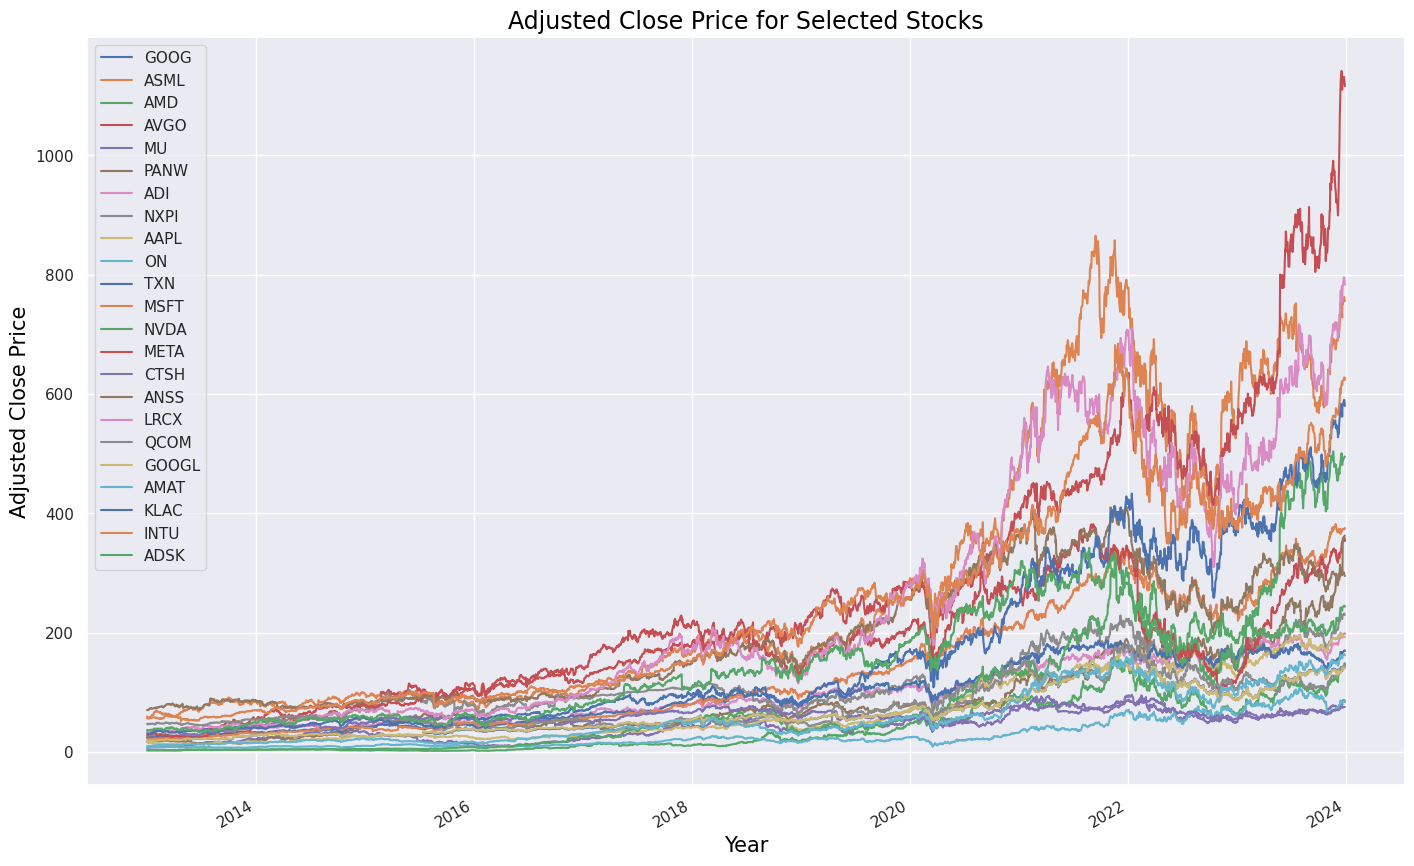

In [ ]:
# Plot Adjusted Close price for all stocks
import seaborn as sns
import matplotlib.pyplot as plt

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(17, 11)})
plt.title('Adjusted Close Price for Selected Stocks', color = 'black', fontsize = 17)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price', color = 'black', fontsize = 15);

Analyze on the appearance years of maximum and minimum adj close price for 23 stocks.

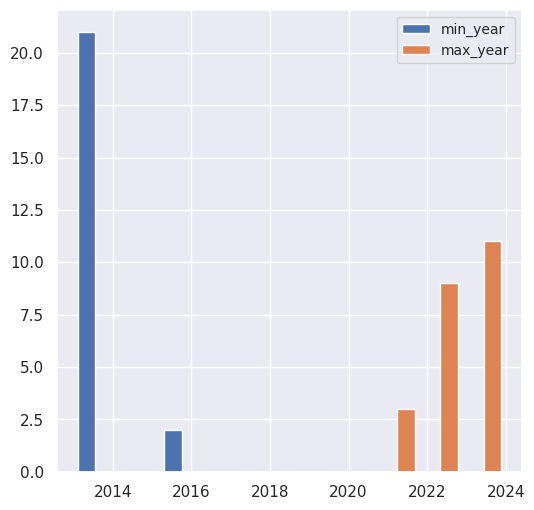

In [ ]:
# Maximum and minimum of adjusted close price of 23 stocks and their apperance years
adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), ndx_stocks.index[x.argmin()], x.max(), ndx_stocks.index[x.argmax()]],
                              index=['min', 'min_year', 'max', 'max_year']))

adj_close_min_max

# Draw the pillar plot to show the distribution of min_year and max_year
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.hist([ndx_stocks.index[adj_close.apply(lambda x: x.argmin())], ndx_stocks.index[adj_close.apply(lambda x: x.argmax())]], label=['min_year', 'max_year'])
plt.legend(prop={'size': 10})
plt.show()
# Data shows that most of the minimums of adjusted closed price appeared in 2013, and most of the maximums of adjusted cloased price appeared in 2023 or 2024

**Analyze on stock returns using end price divided by start price.**

2768
Stocks with the highest average return in 10 years: NVDA
Stocks with the lowest average return in 10 years: QCOM


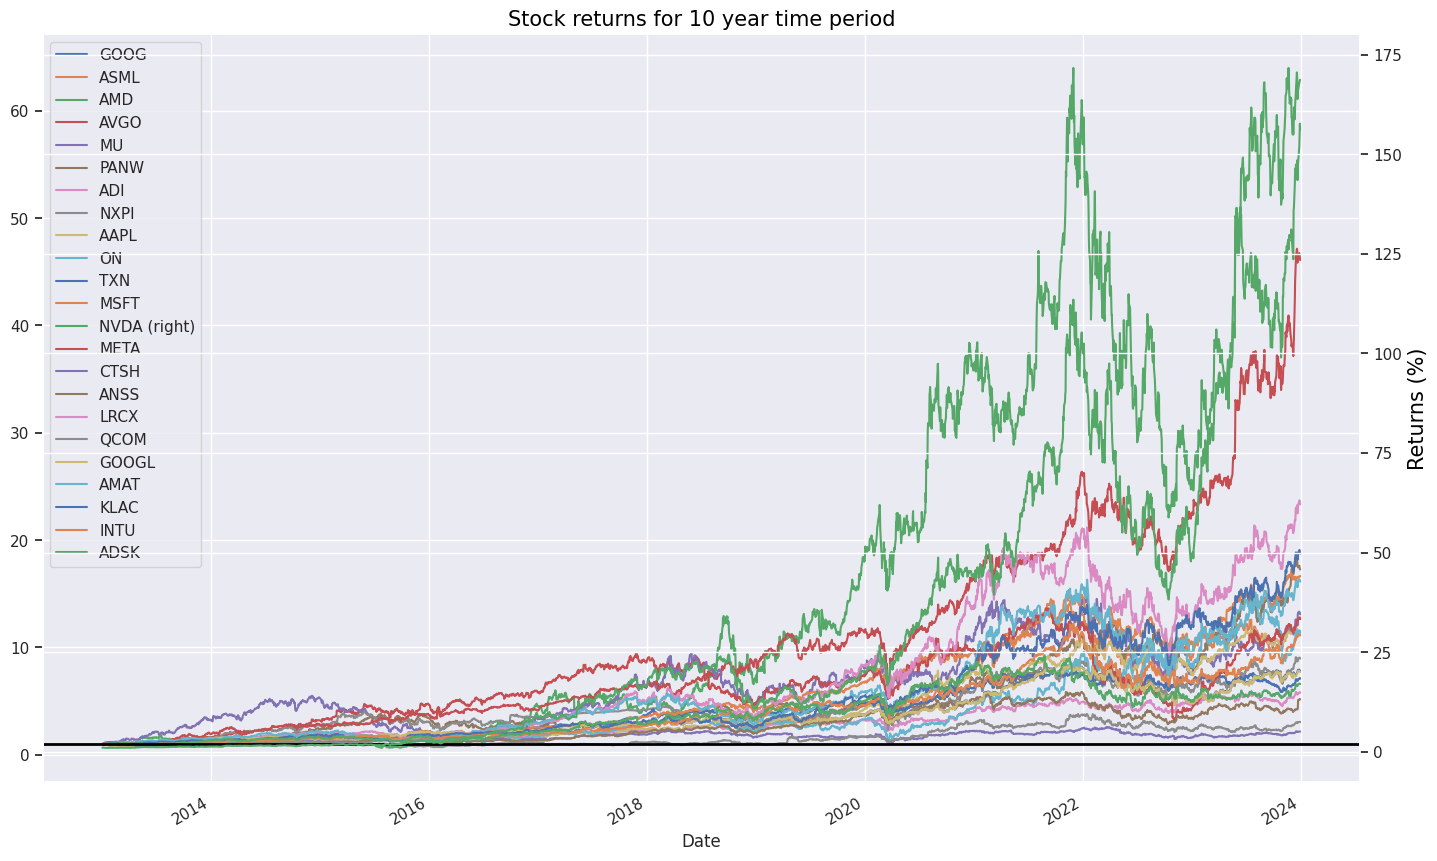

In [ ]:
import numpy as np
# Plot returns = end price/start price
returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()
print(np.shape(returns_lambda)[0])

returns_lambda.plot(secondary_y = ["NVDA"], grid = True).axhline(y = 1, color = "black", lw = 2) #Becasue NVDA is much higher than others, I give it a second y axis on the right
sns.set(rc={'figure.figsize':(13, 7)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 15)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

# Convert the matrix to a numpy array
returns_np = np.array(returns_lambda)
# Calculate the column-wise average
col_averages = np.mean(returns_np, axis=0)
print("Stocks with the highest average return in 10 years:", ndx_symbol[np.argmax(col_averages)])
print("Stocks with the lowest average return in 10 years:", ndx_symbol[np.argmin(col_averages)])

# The plot shows that NVidia has the highest average returns in 10 years, and Qualcomm has the lowest average return in 10 years

Dates of 23 stocks with the lowest return
GOOG : 2013-01-22 00:00:00
ASML : 2013-01-15 00:00:00
AMD : 2015-07-27 00:00:00
AVGO : 2013-04-19 00:00:00
MU : 2013-01-02 00:00:00
PANW : 2013-06-24 00:00:00
ADI : 2013-01-15 00:00:00
NXPI : 2013-04-19 00:00:00
AAPL : 2013-04-19 00:00:00
ON : 2013-10-09 00:00:00
TXN : 2013-01-08 00:00:00
MSFT : 2013-01-10 00:00:00
NVDA : 2013-01-15 00:00:00
META : 2013-06-05 00:00:00
CTSH : 2013-04-25 00:00:00
ANSS : 2013-01-03 00:00:00
LRCX : 2013-01-08 00:00:00
QCOM : 2016-02-10 00:00:00
GOOGL : 2013-01-22 00:00:00
AMAT : 2013-01-08 00:00:00
KLAC : 2013-01-08 00:00:00
INTU : 2013-04-25 00:00:00
ADSK : 2013-06-24 00:00:00

Dates of 23 stocks with the highest return
GOOG : 2021-11-18 00:00:00
ASML : 2021-09-15 00:00:00
AMD : 2021-11-29 00:00:00
AVGO : 2023-12-18 00:00:00
MU : 2022-01-14 00:00:00
PANW : 2023-12-13 00:00:00
ADI : 2023-12-15 00:00:00
NXPI : 2023-12-15 00:00:00
AAPL : 2023-12-14 00:00:00
ON : 2023-08-01 00:00:00
TXN : 2021-10-21 00:00:00
MSFT : 20

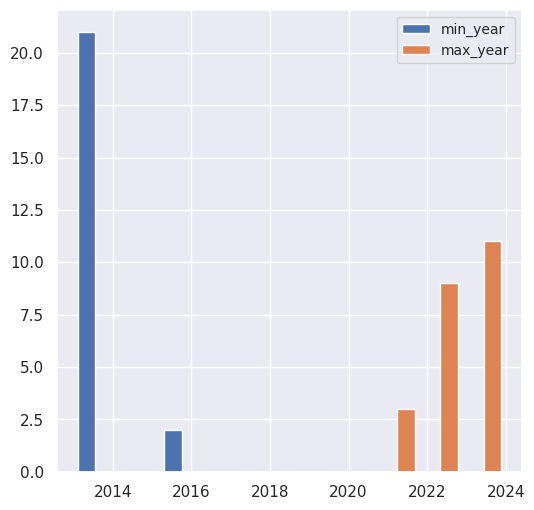

In [ ]:
# Maximum and minimum of returns of 23 stocks and their apperance years
returns_min_max = returns_lambda.apply(lambda x: pd.Series([x.min(), ndx_stocks.index[x.argmin()], x.max(), ndx_stocks.index[x.argmax()]],
                              index=['min', 'min_year', 'max', 'max_year']))
returns_min_max

print("Dates of 23 stocks with the lowest return")
for i in range(len(ndx_symbol)):
  print(ndx_symbol[i], ":", ndx_stocks.index[returns_lambda.apply(lambda x: x.argmin())][i])
print('')
print("Dates of 23 stocks with the highest return")
for i in range(len(ndx_symbol)):
  print(ndx_symbol[i], ":", ndx_stocks.index[returns_lambda.apply(lambda x: x.argmax())][i])

# Draw the pillar plot to show the distribution of min_year and max_year
plt.figure(figsize=(6,6))
plt.hist([ndx_stocks.index[returns_lambda.apply(lambda x: x.argmin())], ndx_stocks.index[returns_lambda.apply(lambda x: x.argmax())]], label=['min_year', 'max_year'])
plt.legend(prop={'size': 10})
plt.show()
# Data shows that most of the minimums of stock return appeared in 2013, and most of the maximums of stock returns appeared in 2023 or 2024

**Analyze on fluctuations of stock price using standard variance.**

In [ ]:
# Calculate the standard variance of the return for 23 stocks to evaluate how fluctuate are the returns in 10 years
returns_lambda_std = returns_lambda.std()
print(returns_lambda_std)
print("Stock which has the highest standard deviation:", returns_lambda_std.idxmax())
print("Stock which has the lowest standard deviation:", returns_lambda_std.idxmin())
# The stock which is the most fluctuate in return is Nvidia, and the stock which is the least fluctuate in return is Cognizant Technology Solutions Corp.

GOOG      2.112472
ASML      3.891691
AMD      16.554382
AVGO      9.248304
MU        3.420606
PANW      3.713671
ADI       1.423816
NXPI      2.018917
AAPL      3.392885
ON        3.283539
TXN       2.183129
MSFT      4.583796
NVDA     39.468754
META      3.130403
CTSH      0.357597
ANSS      1.458170
LRCX      6.187941
QCOM      0.779950
GOOGL     2.069778
AMAT      4.377980
KLAC      4.506965
INTU      2.905488
ADSK      2.231644
dtype: float64
Stock which has the highest standard deviation: NVDA
Stock which has the lowest standard deviation: CTSH


**Visualize the daily percentage change and log change of stock price.**

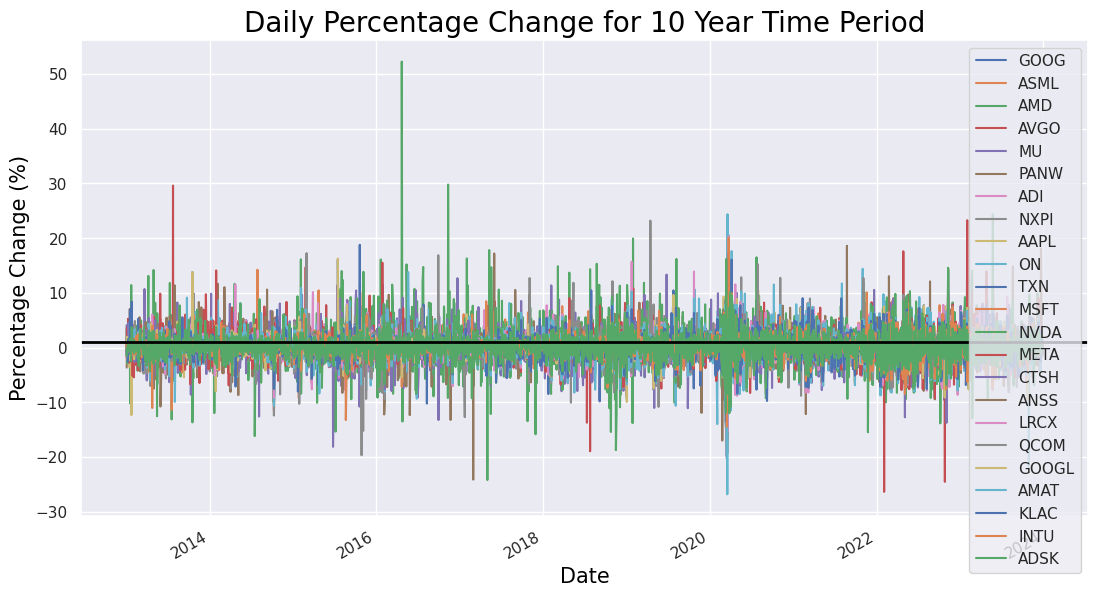

In [ ]:
#Visualized the daily percentage change of 23 stocks
pct_change = pd.DataFrame()
for ticker in tickers:
    pct_change[ticker] = ndx_stocks[ticker]['Adj Close'].pct_change() * 100

pct_change

#drop the first row of NaN
pct_change.dropna(inplace=True)
pct_change.head()

#Plot percentage change
pct_change.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(17, 11)})
plt.title('Daily Percentage Change for 10 Year Time Period', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Percentage Change (%)', color = 'black', fontsize = 15);

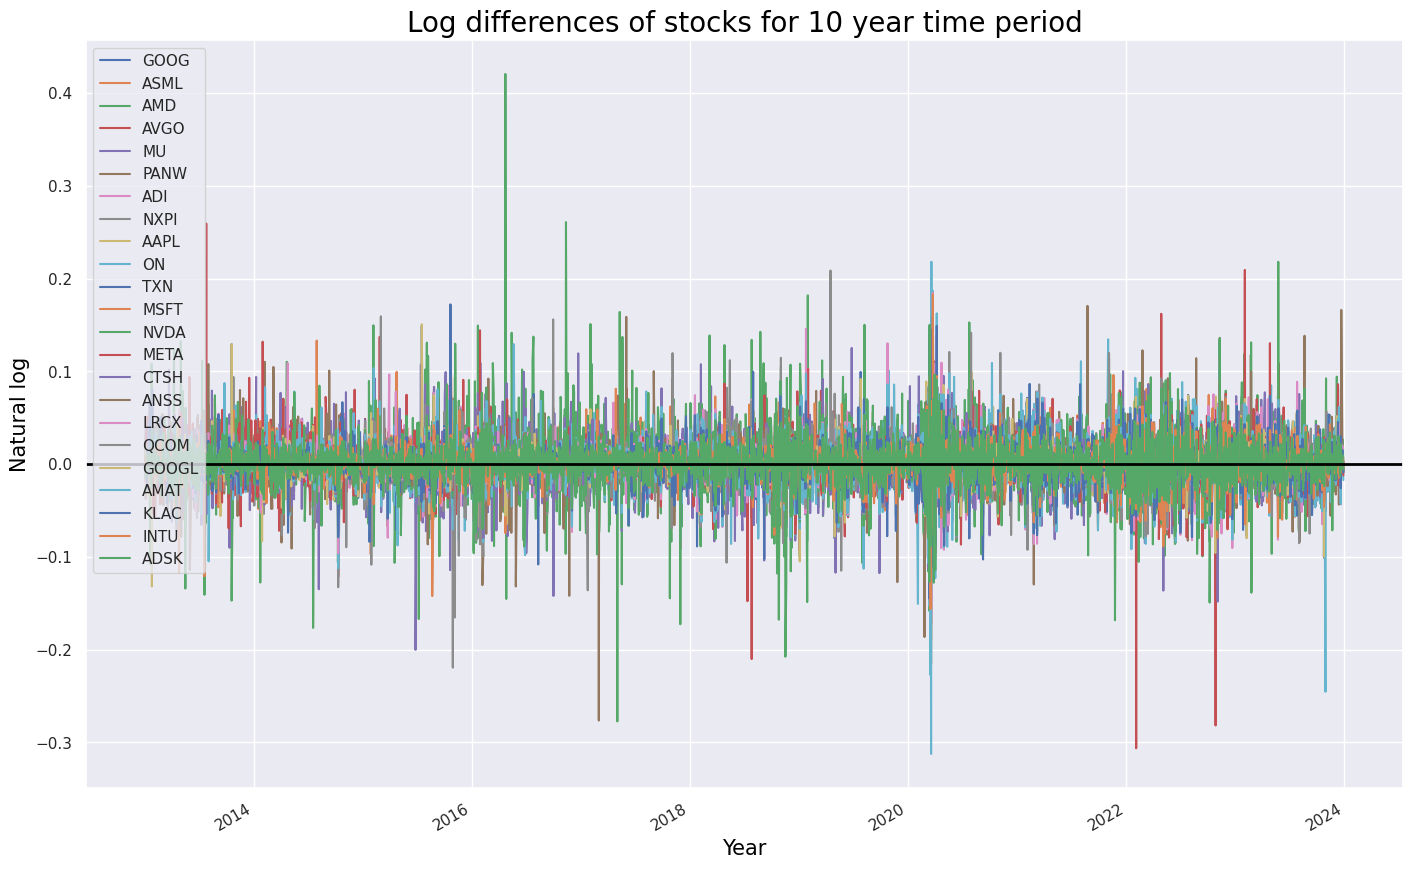

In [ ]:
"""
Visualized the daily log change of 23 stocks (The main difference between percentage change and log change is that percentage change
is a linear measure of the change, while log change is a logarithmic measure of the change. This means that percentage change is
more sensitive to small changes in the variable, while log change is more sensitive to large changes in the variable.)
"""
log_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # "shift" moves dates back by 1.

log_change.head()

#Drop the first column of NaNs
log_change.dropna(inplace=True)
log_change.head()

#Plot log change
log_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

**Analyze on PE ratios of selected companies.**

In [ ]:
# Get companies' financial data from yahoo finance
!pip install yahoo_fin
!pip install requests_html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=32575a1461d897fd71feb821552b670cfcfd899d9eeeec530d7623dfc90c21e0
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
import yahoo_fin.stock_info as si
import warnings
import pandas as pd

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

PE_ratio = []
for symbol in ndx_symbol:
  PE_ratio.append(si.get_quote_table(symbol)['PE Ratio (TTM)'])

df_PE = pd.DataFrame(list(zip(ndx_symbol, PE_ratio)), columns=['Ticker', 'PE Ratio'])
print(df_PE) # print the PE ratio of each company in trailing twelve months

print("Company which has the maximum PE ratio in the trailing 12 months:", df_PE['Ticker'][PE_ratio.index(max(PE_ratio))])
print("Company which has the minimum PE ratio in the trailing 12 months:", df_PE['Ticker'][PE_ratio.index(min(PE_ratio))])
# It shows that AMD has the maximum PE ratio and ON Semiconductor has the minimum PE ratio in the trailing 12 months

   Ticker  PE Ratio
0    ANSS     60.92
1    INTU     69.93
2   GOOGL     24.77
3    QCOM     20.55
4    META     30.85
5      MU       NaN
6    NVDA     91.71
7    MSFT     36.64
8    AAPL     29.14
9    AVGO     37.74
10   CTSH     18.92
11   LRCX     32.78
12   PANW    192.45
13   ASML     41.85
14   GOOG     25.03
15   ADSK     59.48
16     ON     15.87
17    AMD    335.06
18   AMAT     21.10
19   KLAC     31.15
20    TXN     22.48
21   NXPI     20.48
22    ADI     29.40
Company which has the maximum PE ratio in the trailing 12 months: AMD
Company which has the minimum PE ratio in the trailing 12 months: ON
